In [3]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [2]:
import pandas as pd

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2.0,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3.0,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4.0,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5.0,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
## drop day month yr

In [13]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [15]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [25]:
df['Classes']  = np.where(df['Classes'].str.contains('not fire'),0,1)

In [23]:
import numpy as np

In [27]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [28]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [29]:
# independent & dependent features
x = df.drop('BUI', axis=1)
y = df['BUI']

In [30]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,0.5,0,0


In [31]:
y.head()

0    3.4
1    3.9
2    2.7
3    1.7
4    3.9
Name: BUI, dtype: float64

In [37]:
# perform train test and split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [43]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes,Region
Temperature,1.000000,-0.665375,-0.262021,-0.313342,0.669417,0.466192,0.353326,0.629015,0.582132,0.540838,0.264424
RH,-0.665375,1.000000,0.225975,0.171333,-0.626228,-0.407481,-0.215377,-0.679022,-0.574857,-0.428900,-0.421861
Ws,-0.262021,0.225975,1.000000,0.164479,-0.134579,0.001609,0.106195,-0.001911,0.027929,-0.085649,-0.229147
Rain,-0.313342,0.171333,0.164479,1.000000,-0.536995,-0.317512,-0.328136,-0.364116,-0.346687,-0.404393,-0.014309
FFMC,0.669417,-0.626228,-0.134579,-0.536995,1.000000,0.608632,0.515803,0.737458,0.693348,0.774867,0.246910
DMC,0.466192,-0.407481,0.001609,-0.317512,0.608632,1.000000,0.865782,0.683608,0.876851,0.581037,0.195856
DC,0.353326,-0.215377,0.106195,-0.328136,0.515803,0.865782,1.000000,0.516046,0.744029,0.526880,-0.110222
ISI,0.629015,-0.679022,-0.001911,-0.364116,0.737458,0.683608,0.516046,1.000000,0.922620,0.715183,0.266504
FWI,0.582132,-0.574857,0.027929,-0.346687,0.693348,0.876851,0.744029,0.922620,1.000000,0.702455,0.197492
Classes,0.540838,-0.428900,-0.085649,-0.404393,0.774867,0.581037,0.526880,0.715183,0.702455,1.000000,0.158340


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

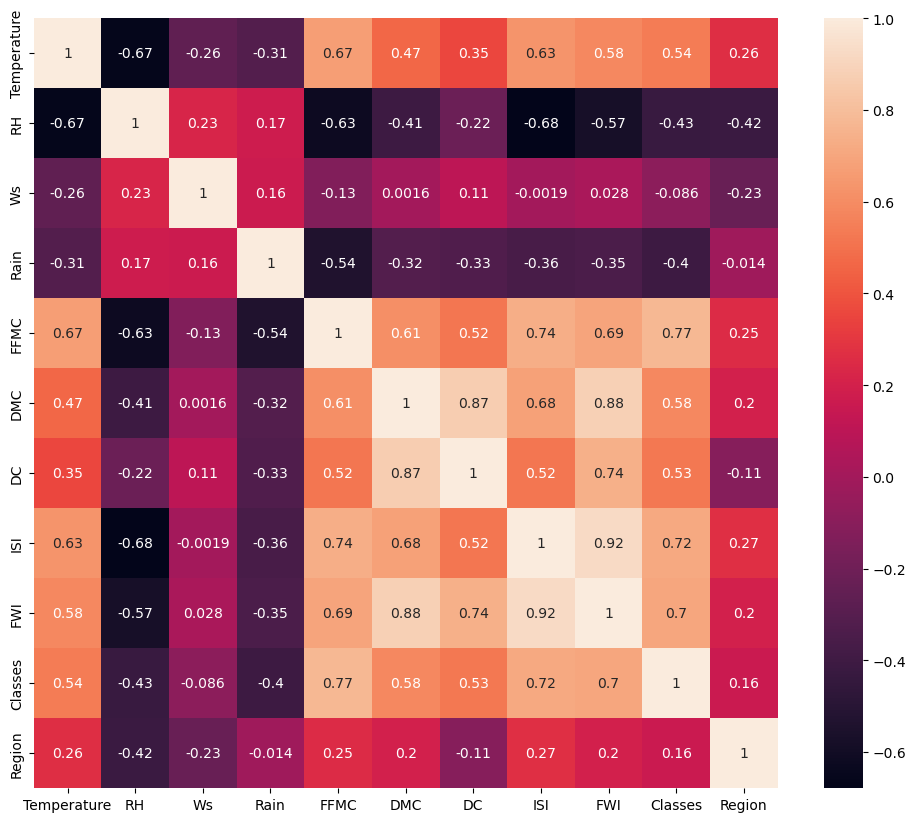

In [46]:
# check for multi_collinearity
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [47]:
# Calculate the correlation matrix
correlation_matrix = x_train.corr()

def corr_features(data, threshold):
    correlation_matrix = data.corr()
    # Identify pairs with correlation > 0.9
    high_correlation_pairs = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:  # Threshold for multicollinearity
                colname1 = correlation_matrix.columns[i]
                colname2 = correlation_matrix.columns[j]
                high_correlation_pairs.add((colname1, colname2))
    
    # Display correlated pairs
    print("Highly correlated pairs (>0.9):", high_correlation_pairs)
    
    # Drop one feature from each pair
    features_to_remove = set()
    for col1, col2 in high_correlation_pairs:
        features_to_remove.add(col1)  # Choose col1; you can change this to col2 if needed.
    
    x_train_after_dropped = x_train.drop(columns=features_to_remove)
    
    print("Features removed:", features_to_remove)
    print("DataFrame after removing features with high multicollinearity:")
    print(x_train_after_dropped)
    return x_train_after_dropped

In [48]:
x_train_1 = corr_features(x_train, 0.90)

Highly correlated pairs (>0.9): {('FWI', 'ISI')}
Features removed: {'FWI'}
DataFrame after removing features with high multicollinearity:
     Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI  Classes  Region
0             29  57  18   0.0  65.7   3.4    7.6  1.3        0       0
154           34  56  17   0.1  84.7   9.7   27.3  4.7        1       1
164           39  45  13   0.6  85.2  11.3   10.4  4.2        1       1
110           29  57  14   0.0  89.3  12.5   41.3  7.8        1       0
224           31  72  14   0.0  84.2   8.3   25.2  3.8        1       1
..           ...  ..  ..   ...   ...   ...    ...  ...      ...     ...
137           29  87  15   0.4  47.4   4.2    8.0  0.2        0       1
72            35  51  13   0.3  81.3  15.6   75.1  2.5        0       0
140           32  67  14   4.5  64.6   4.4    8.2  1.0        0       1
235           35  56  14   0.0  89.0  29.4  115.6  7.5        1       1
37            33  68  19   0.0  85.6  12.5   49.8  6.0        1       

In [49]:
type(x_train_1)

pandas.core.frame.DataFrame

In [50]:
x_train_1.shape

(194, 10)

In [57]:
x_train.shape

(194, 11)

In [59]:
x_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI',
       'Classes', 'Region'],
      dtype='object')

In [61]:
#x_test.drop('FWI', axis=1,inplace=True)
x_test.shape

(49, 11)

In [68]:
x_test.drop('FWI', axis=1,inplace=True)

In [70]:
# feature scaling

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_1)
x_test_scaled = scaler.transform(x_test)

In [74]:
x_train_scaled

array([[-0.91677113, -0.2863854 ,  0.93787626, ..., -0.85897231,
        -1.20652236, -1.05294618],
       [ 0.47488458, -0.35260563,  0.56956048, ..., -0.05061429,
         0.8288284 ,  0.94971616],
       [ 1.86654028, -1.0810281 , -0.90370263, ..., -0.16949047,
         0.8288284 ,  0.94971616],
       ...,
       [-0.08177771,  0.37581684, -0.53538685, ..., -0.93029802,
        -1.20652236,  0.94971616],
       [ 0.75321572, -0.35260563, -0.53538685, ...,  0.61509231,
         0.8288284 ,  0.94971616],
       [ 0.19655343,  0.44203707,  1.30619203, ...,  0.25846378,
         0.8288284 , -1.05294618]])

In [76]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train_1.columns)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7764\4284258809.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(x_train_1.values, labels=x_train_1.columns)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7764\4284258809.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(x_train_scaled.values, labels=x_train_scaled.columns)


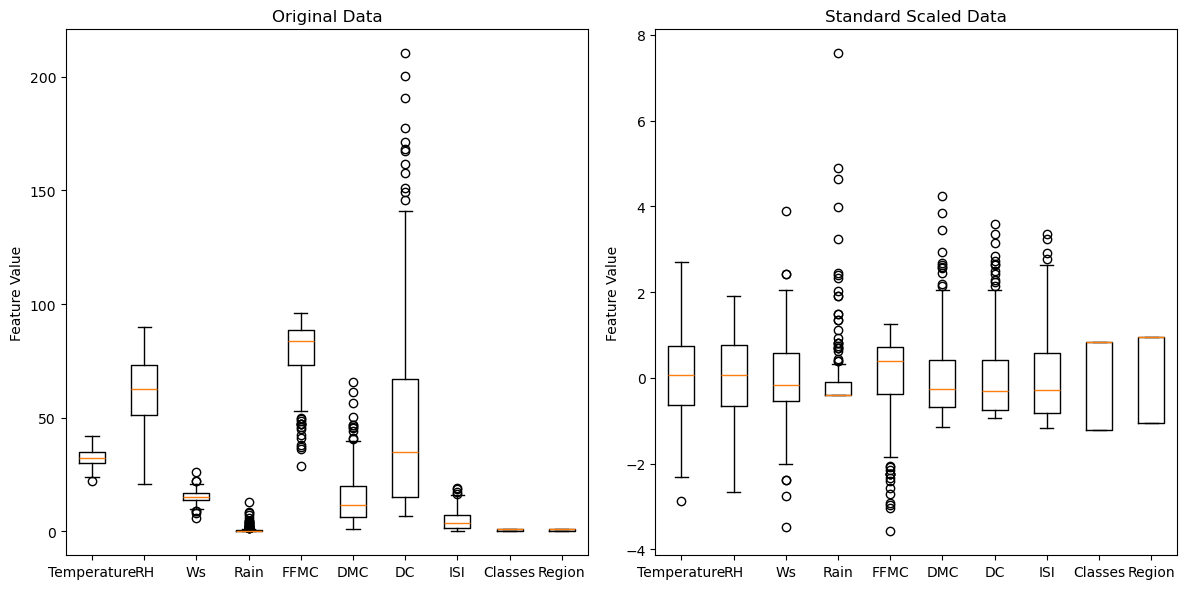

In [78]:
# Plot boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original data boxplot
axes[0].boxplot(x_train_1.values, labels=x_train_1.columns)
axes[0].set_title('Original Data')
axes[0].set_ylabel('Feature Value')

# Scaled data boxplot
axes[1].boxplot(x_train_scaled.values, labels=x_train_scaled.columns)
axes[1].set_title('Standard Scaled Data')
axes[1].set_ylabel('Feature Value')

# Show the plots
plt.tight_layout()
plt.show()

In [80]:
##linear regression model

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Absolute Error 0.6499571141464421
R2 Score 0.9780511479516228


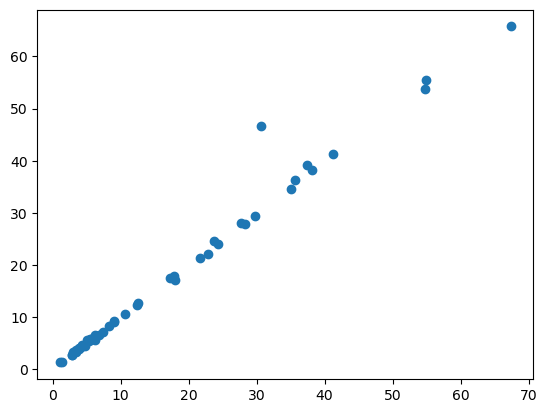

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train)

y_pred = linreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)
plt.show()

In [84]:
# LASSO 

In [86]:
from sklearn.linear_model import Lasso

mean abs error 1.2933772135785562
R2 Score 0.9771188025395376


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


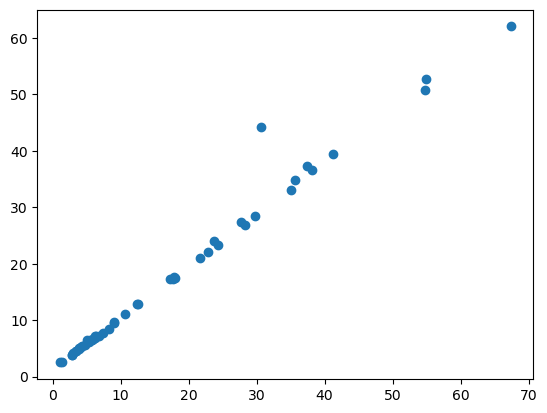

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("mean abs error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)
plt.show()

In [91]:
# cross validation lasso

In [93]:
from sklearn.linear_model import LassoCV

In [95]:
lassocv = LassoCV(cv=4)
lassocv.fit(x_train_scaled, y_train)

LassoCV(cv=4)

In [97]:
lassocv.alpha_

0.03856195730082318

In [99]:
lassocv.alphas_

array([13.53984257, 12.6273025 , 11.77626457, 10.98258375, 10.24239437,
        9.55209127,  8.90831229,  8.30792185,  7.74799573,  7.22580674,
        6.73881155,  6.28463821,  5.86107463,  5.46605781,  5.09766381,
        4.75409833,  4.43368802,  4.13487228,  3.85619573,  3.59630104,
        3.35392239,  3.12787925,  2.91707065,  2.72046985,  2.53711929,
        2.36612594,  2.20665697,  2.05793568,  1.9192377 ,  1.7898875 ,
        1.66925508,  1.55675287,  1.45183294,  1.35398426,  1.26273025,
        1.17762646,  1.09825838,  1.02423944,  0.95520913,  0.89083123,
        0.83079219,  0.77479957,  0.72258067,  0.67388116,  0.62846382,
        0.58610746,  0.54660578,  0.50976638,  0.47540983,  0.4433688 ,
        0.41348723,  0.38561957,  0.3596301 ,  0.33539224,  0.31278792,
        0.29170707,  0.27204699,  0.25371193,  0.23661259,  0.2206657 ,
        0.20579357,  0.19192377,  0.17898875,  0.16692551,  0.15567529,
        0.14518329,  0.13539843,  0.12627302,  0.11776265,  0.10

In [101]:
lassocv.mse_path_

array([[2.47734428e+02, 8.99676971e+01, 2.27214331e+02, 1.69572708e+02],
       [2.47734428e+02, 7.93365421e+01, 2.27214331e+02, 1.49827732e+02],
       [2.35982959e+02, 7.00646868e+01, 1.98761205e+02, 1.32550253e+02],
       [2.11997281e+02, 6.19767943e+01, 1.73403087e+02, 1.17425907e+02],
       [1.86045228e+02, 5.49202499e+01, 1.51368067e+02, 1.04180803e+02],
       [1.61726694e+02, 4.87622095e+01, 1.31875692e+02, 9.25762814e+01],
       [1.40585981e+02, 4.33296395e+01, 1.14659156e+02, 8.24043570e+01],
       [1.22209832e+02, 3.76889119e+01, 9.96903111e+01, 7.34837504e+01],
       [1.06234747e+02, 3.27849136e+01, 8.66773904e+01, 6.56564357e+01],
       [9.23485653e+01, 2.85217250e+01, 7.53627915e+01, 5.84295525e+01],
       [8.02786194e+01, 2.48158790e+01, 6.55275292e+01, 5.09497941e+01],
       [6.97898201e+01, 2.15943727e+01, 5.69773639e+01, 4.44372112e+01],
       [6.06721970e+01, 1.87941412e+01, 4.95434972e+01, 3.87658547e+01],
       [5.27502032e+01, 1.63603002e+01, 4.30825430e

In [103]:
y_pred = lassocv.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("mean absolute error", mae)
print("R2 Score", score)

mean absolute error 0.6640779844967079
R2 Score 0.978104063801614


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


In [105]:
## Ridge

mean absolute error 0.663476031201014
R2_Score 0.9781701392364035


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


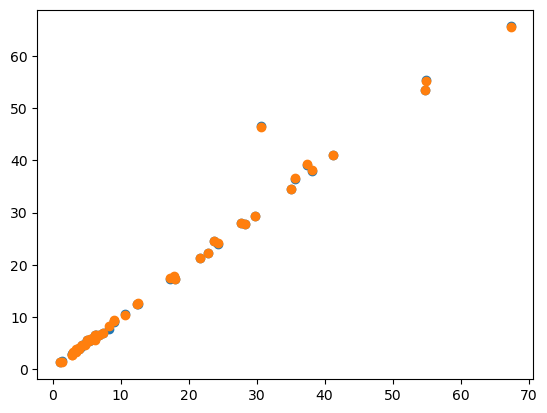

In [107]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("mean absolute error", mae)
print("R2_Score", score)
plt.scatter(y_test,y_pred)
plt.show()

In [108]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=4)
ridgecv.fit(x_train_scaled, y_train)
y_pred = ridgecv.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("mean absolute error", mae)
print("R2 Score", score)

mean absolute error 0.6511879742074411
R2 Score 0.9780630911309972


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [111]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 4,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## ElasticnET Regression

In [114]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled, y_train)
y_pred = elasticnet.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("mean absolute error", mae)
print("R2 Score", score)

mean absolute error 2.7851178314563794
R2 Score 0.9393231742388072


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


In [116]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=4)
elasticnetcv.fit(x_train_scaled, y_train)
y_pred = elasticnetcv.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("mean absolute error", mae)
print("R2 Score", score)

mean absolute error 0.6977948897068375
R2 Score 0.9782764579108159


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


In [118]:
## pickle our ML models, preprocessing model, StandardScaler

In [120]:
scaler

StandardScaler()

In [122]:
ridge

Ridge()

In [124]:
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(ridge, open('ridge.pkl','wb'))
